In [81]:

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [80]:
#creating a dataframe
data=pd.read_csv("HousingData.csv")
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [82]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [84]:

data.isna().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


there is presence of missing data in 5 columns

In [85]:

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [62]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


Using the most frequent data to fill the missing columns as the arent many to warrant dropping the whole column

In [63]:

data_imputed.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

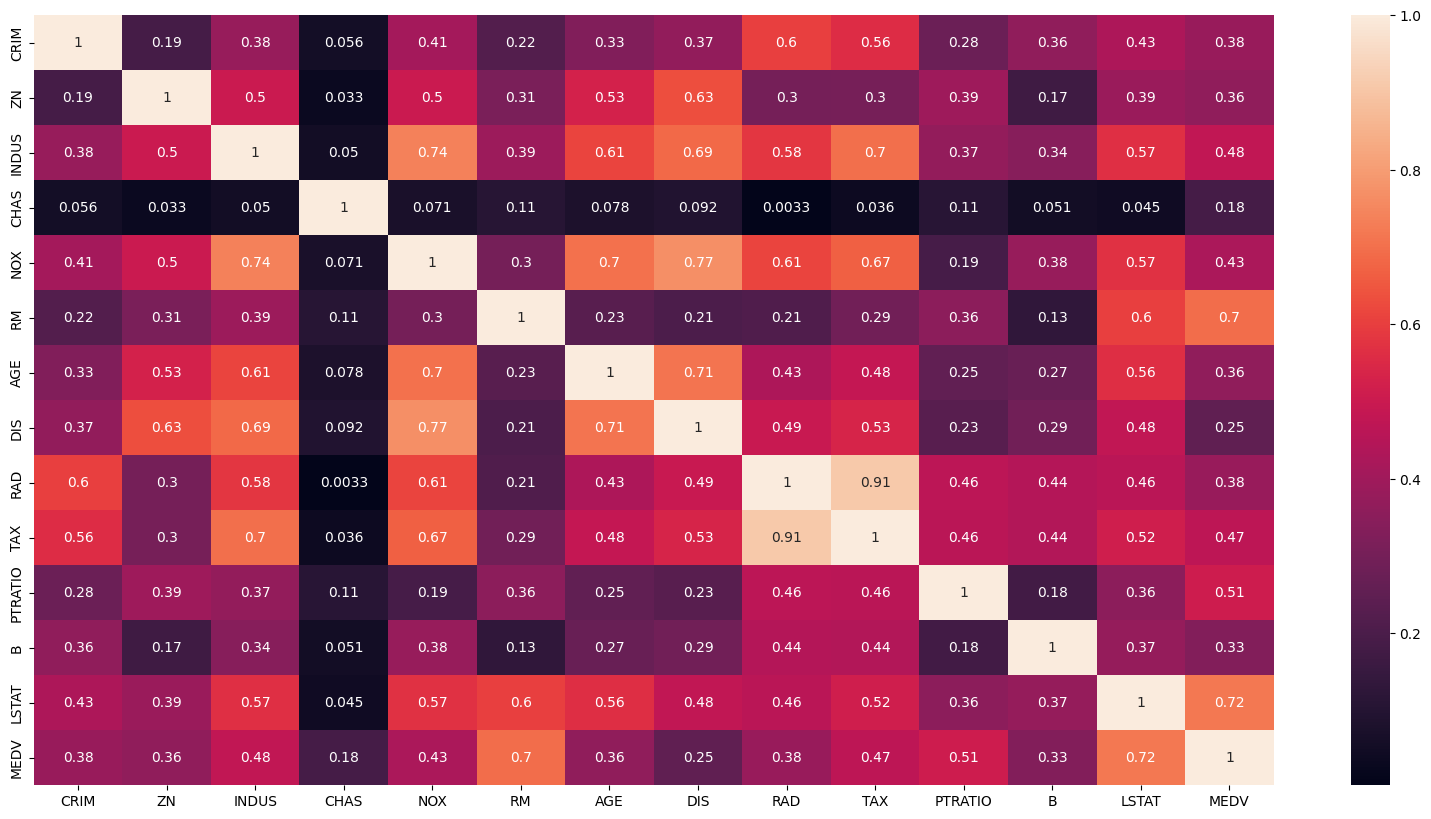

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_imputed.corr().abs(),  annot=True)

plt.show()



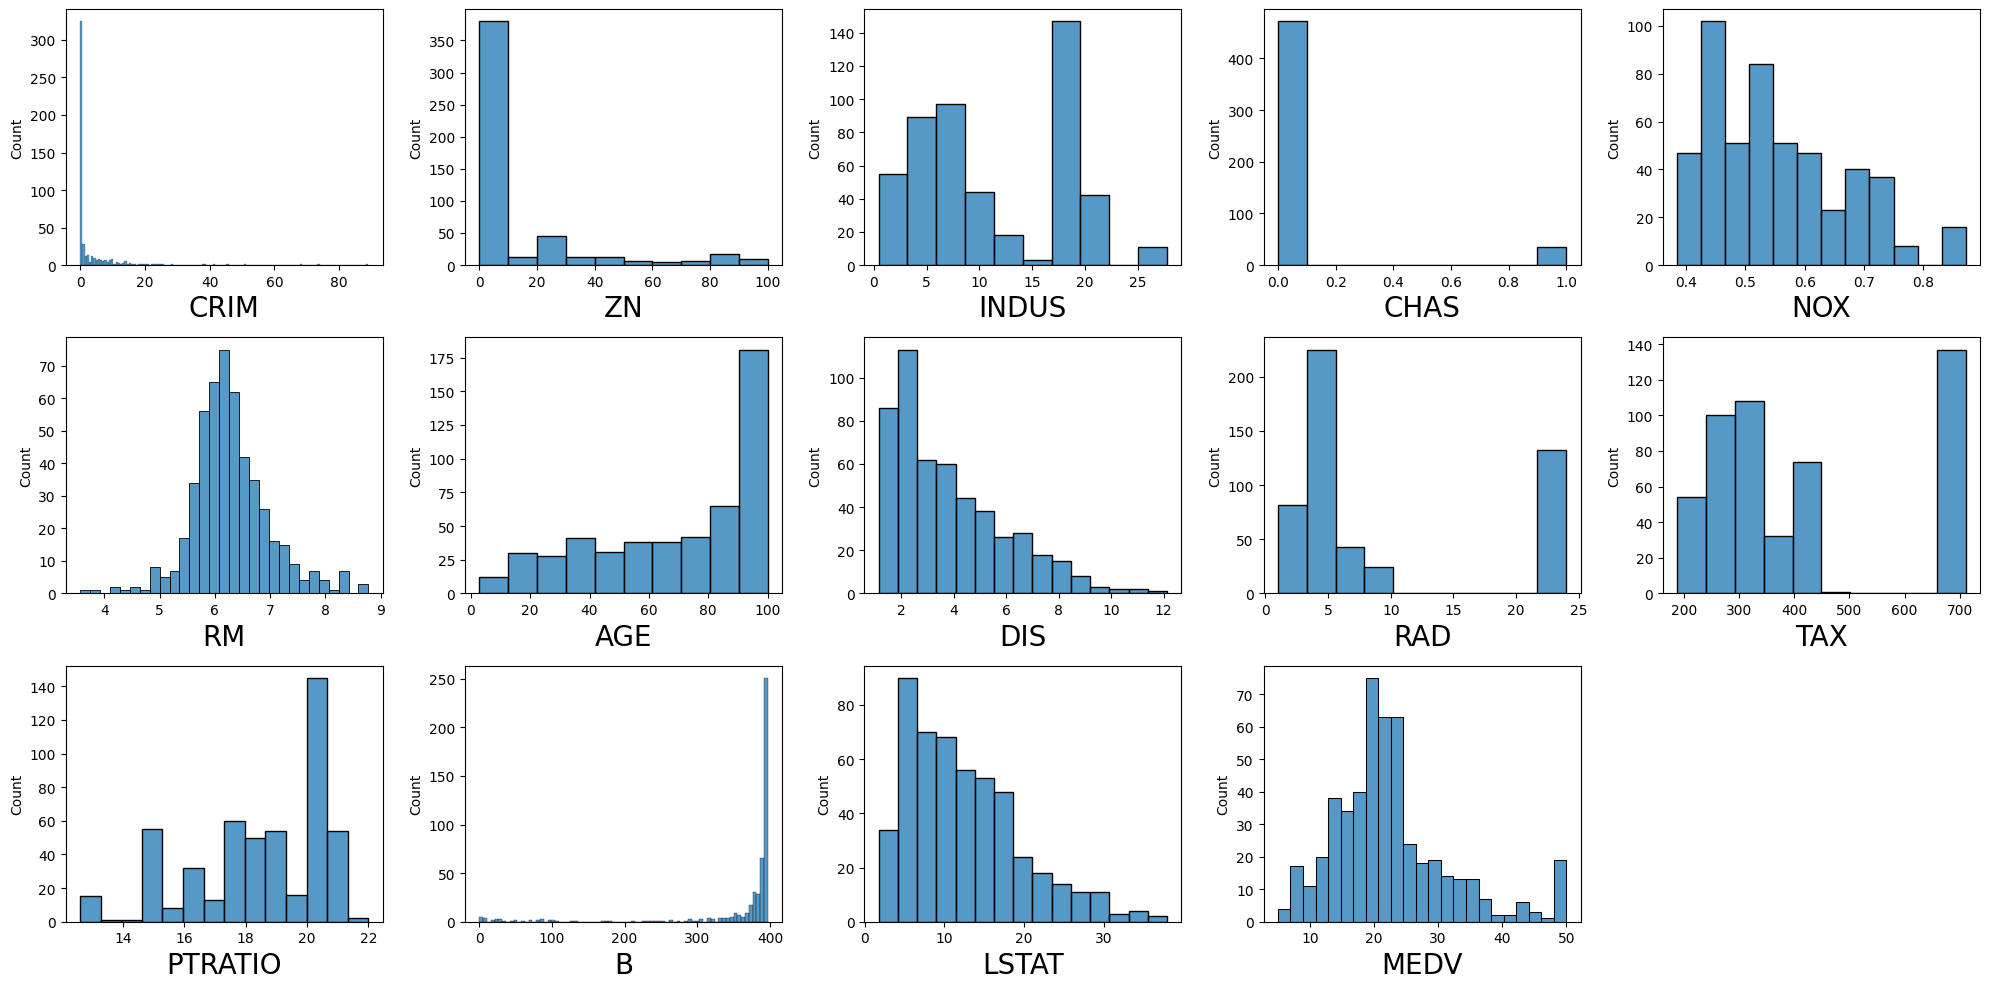

In [23]:
#distribution for every column
plt.figure(figsize=(20, 10))
plotnumber = 1
for column in data_imputed:
    if plotnumber<=14 :
        ax = plt.subplot(3,5,plotnumber)
        sns.histplot(data_imputed[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


CRIM-peer capita crime rate by town
ZN-residential land zoned for large lots
INDUS-non retailbusiness acres per town
CHAS-property located on Charles river.
NOX -nitric oxide concentration (measure of air polllution)
RM-rooms >average number of rooms per dwelling in a given area.
AGE-houses built before 1940
Dis-represents the weighted distances to 5 Boston employment centers .provides inffo about the weighted distances from a residential area to employment centers.(they are based on acccessibility and convinience of transportation to employment centers.)
RAD-index for accessibility to radial highways.
TAx-tax rate.property tax rate for each property.
PTRATIO-pupil teacher ratio.
number of students to the number of teachers in the school disrict.
B-proportion of black residents in town.
LSTAT-lower status of the population in the neighbourhoodd considered to be of lower socio economic status.
MEDV-median value of owner occcupied homes.
Median prices of homes

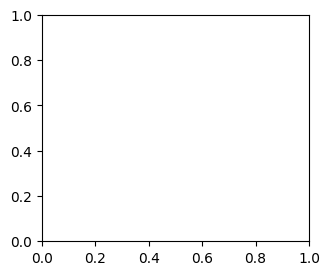

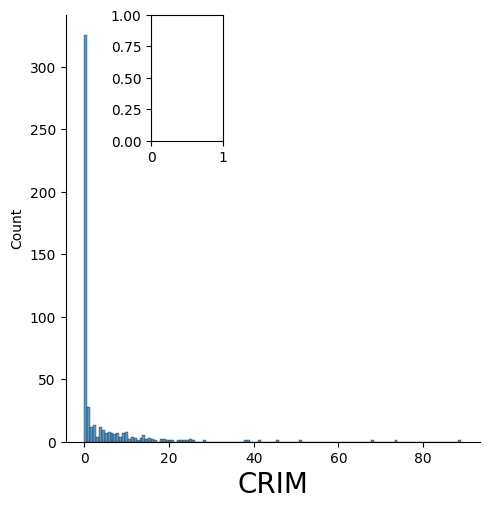

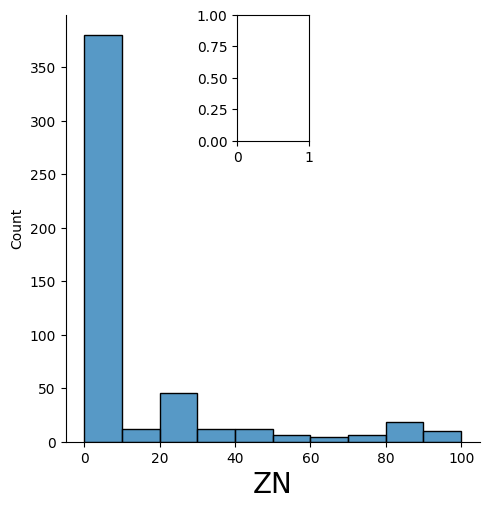

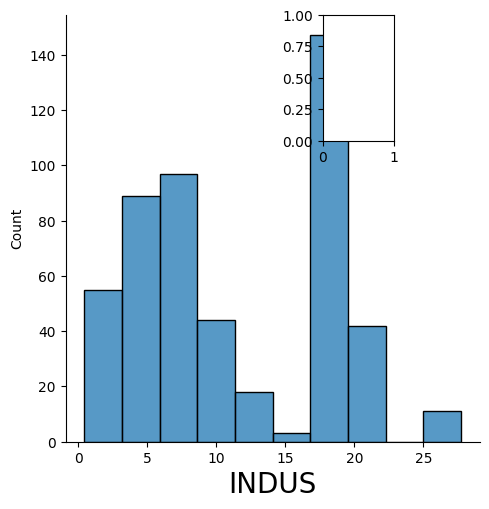

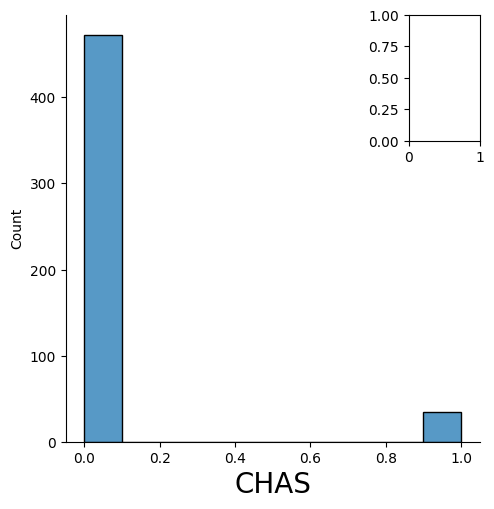

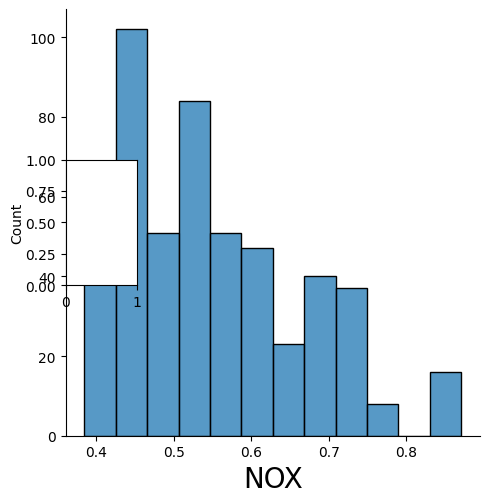

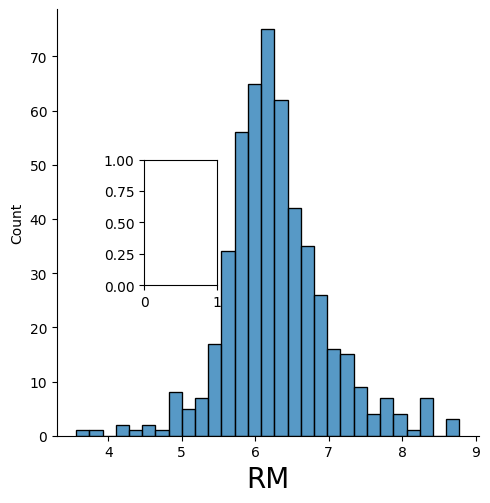

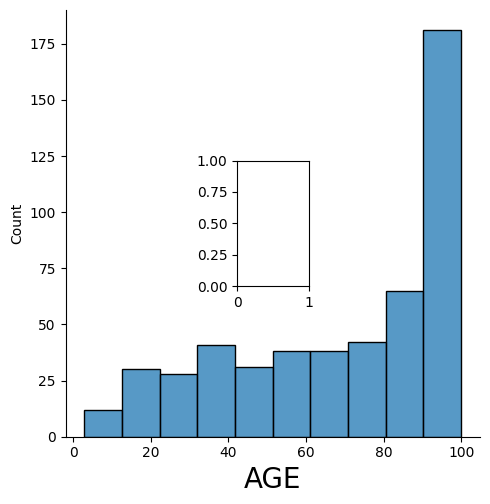

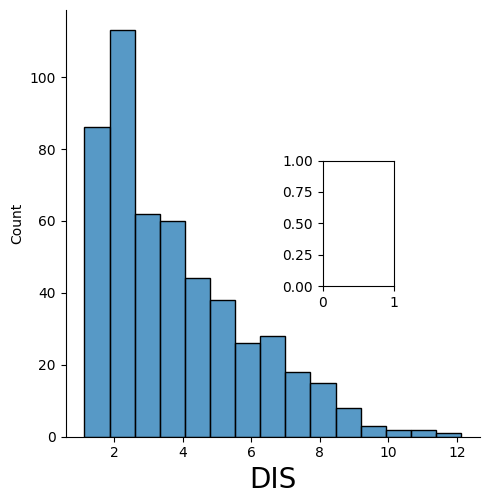

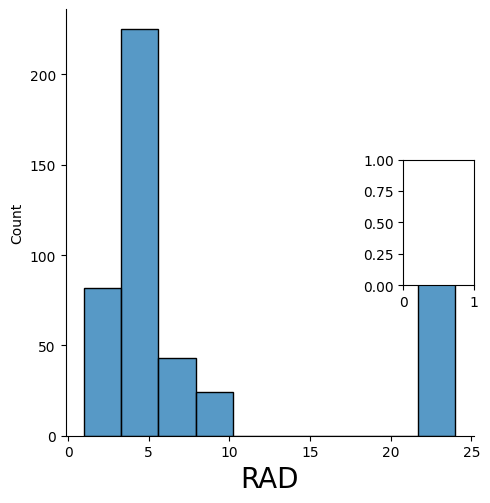

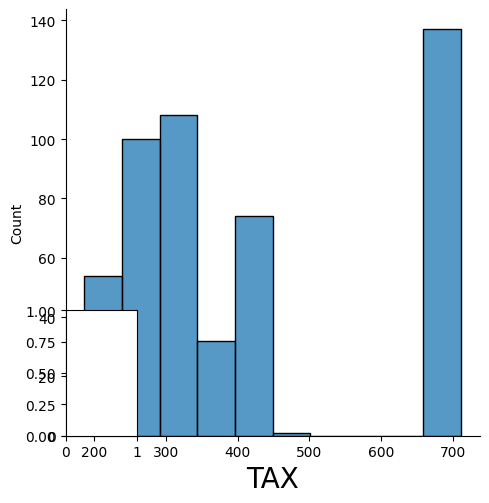

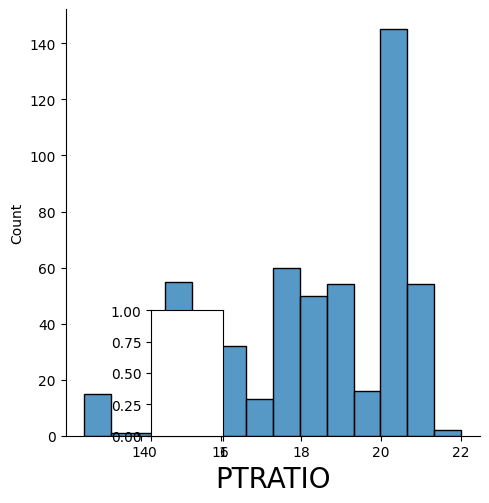

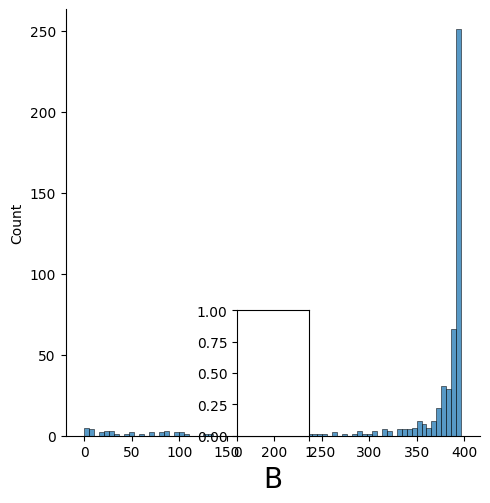

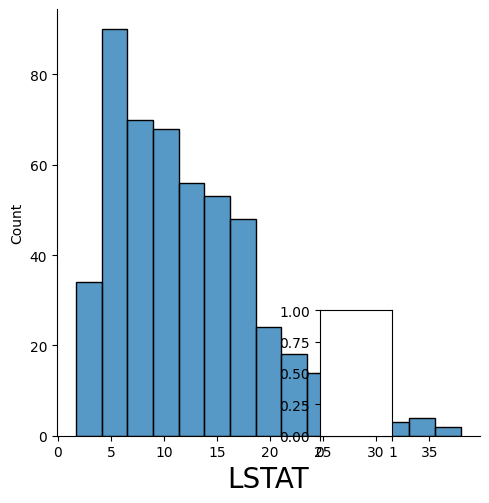

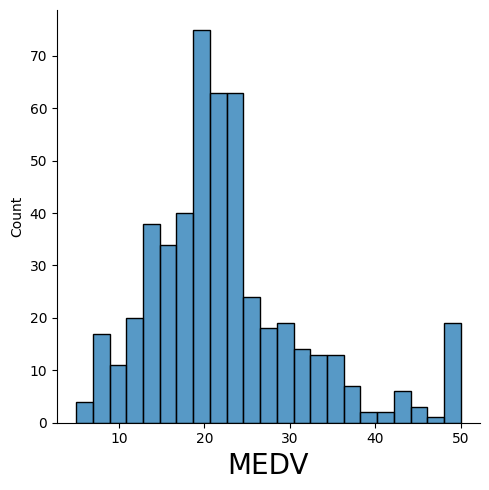

In [24]:

#distribution for every column
plt.figure(figsize=(20, 10))
plotnumber = 1
for column in data_imputed:
    if plotnumber<=14 :
        ax = plt.subplot(3,5,plotnumber)
        sns.displot(data_imputed[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


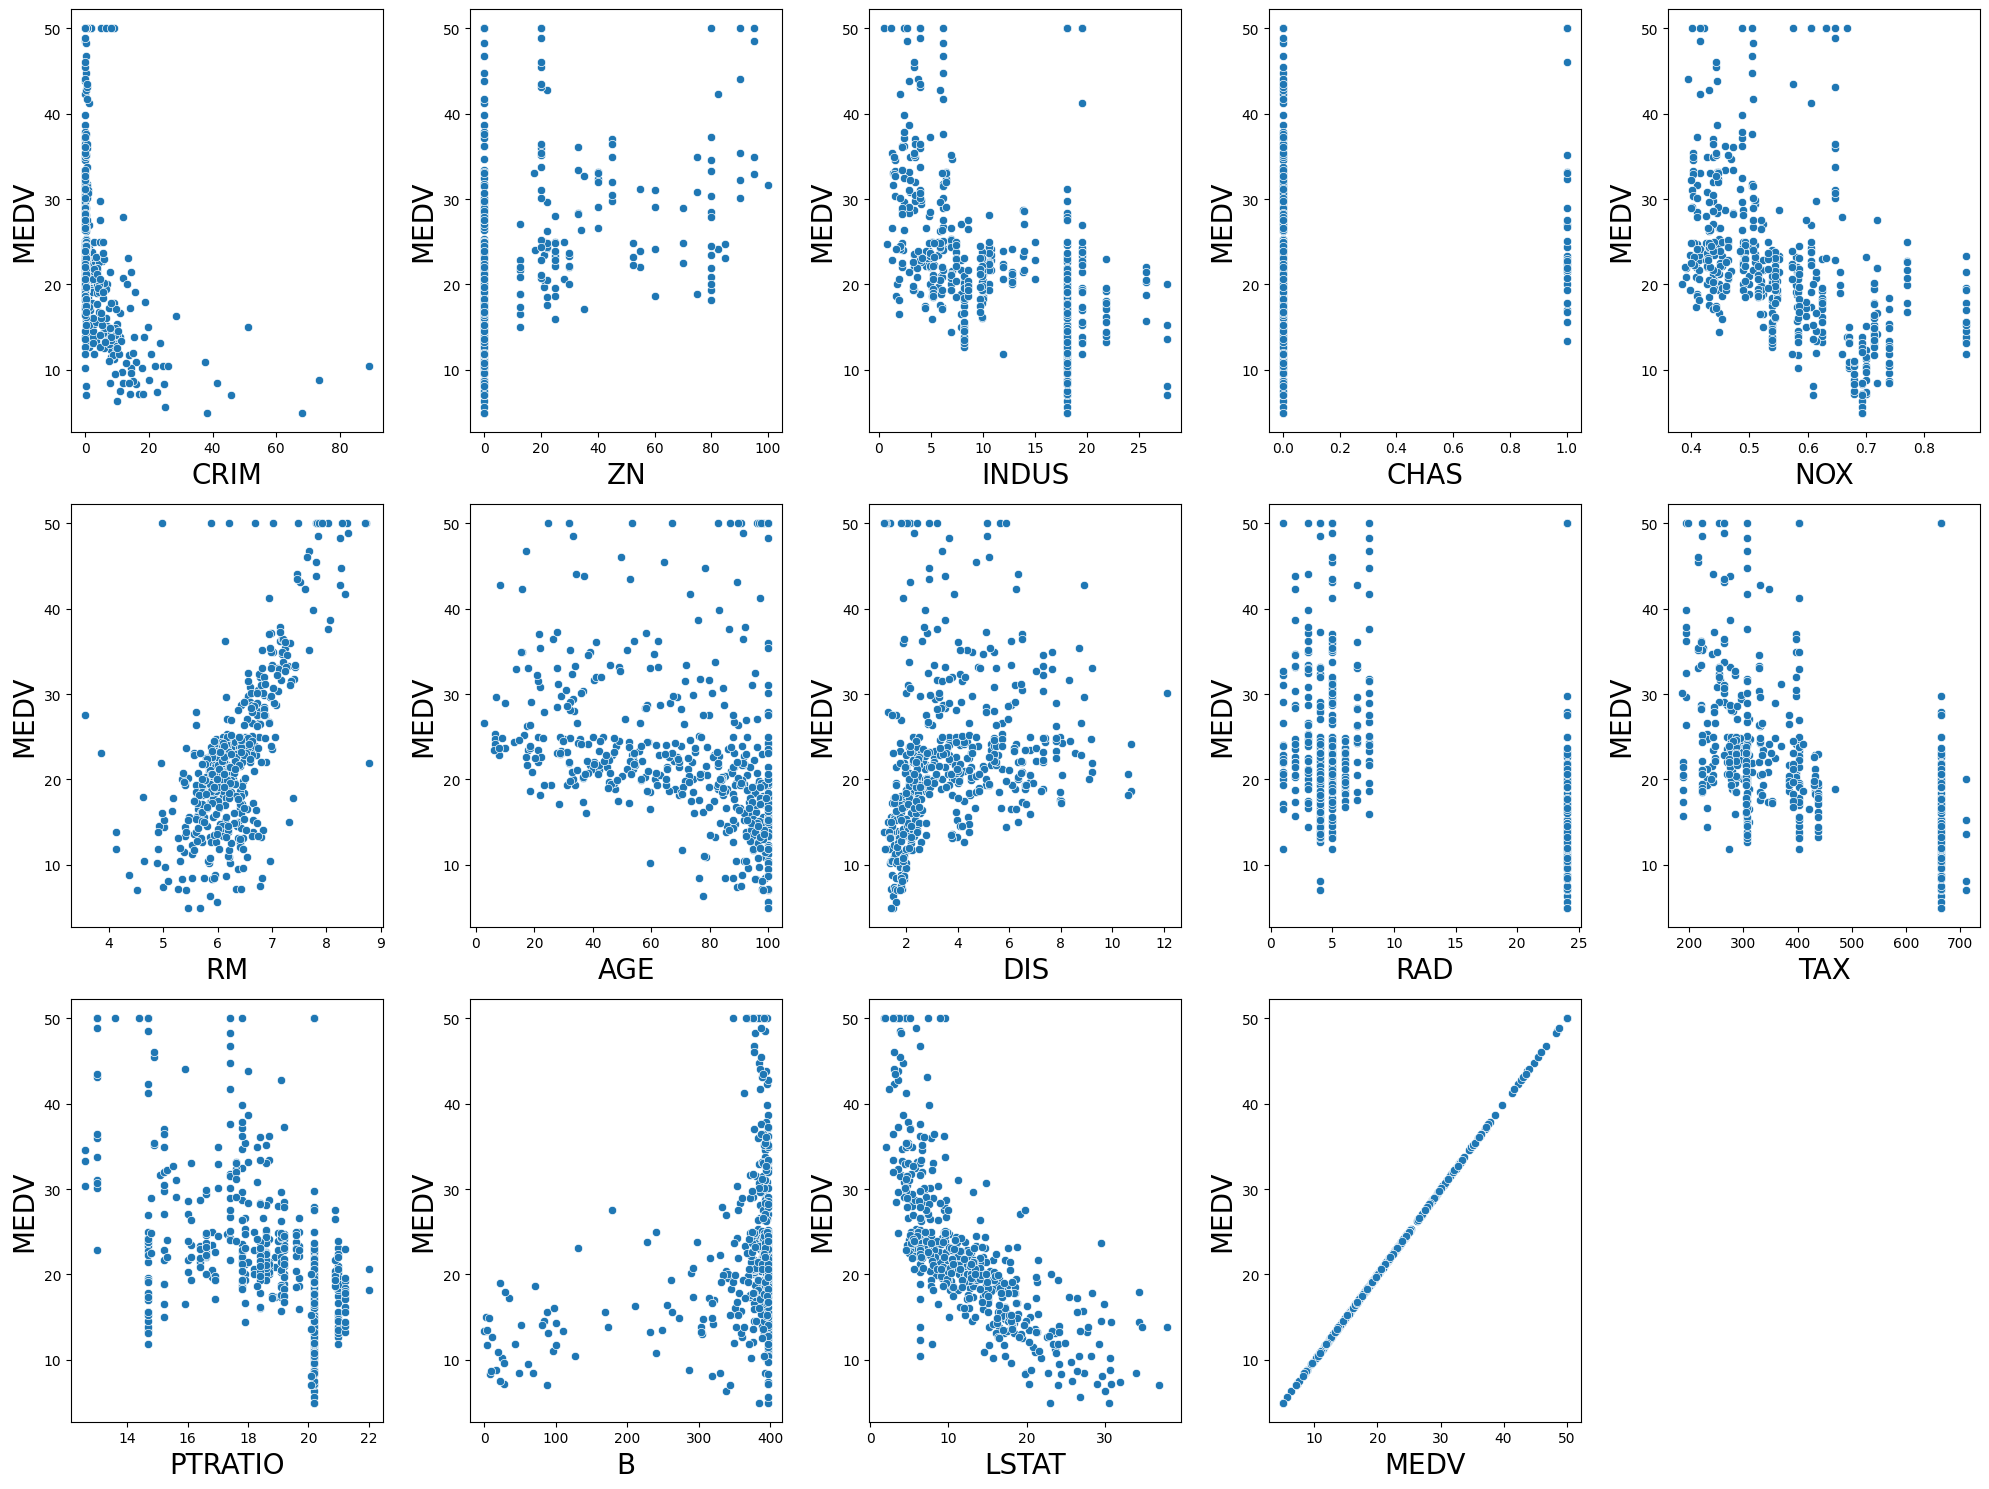

In [64]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data_imputed
columns_to_plot = data_imputed.columns

plt.figure(figsize=(20,15))

for plotnumber, column in enumerate(columns_to_plot, 1):
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x=column, y='MEDV', data=data_imputed)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('MEDV', fontsize=20)

plt.tight_layout()
plt.show()


INSIGHTS

RM (Average Number of Rooms):
Positive correlation:Generally upward trend, indicating that houses with more rooms tend to have higher prices.

LSTAT (Percentage of Lower Status of the Population):
Negative correlation: A downward trend suggest that areas with a higher percentage of lower-status population tend to have lower housing prices.

CRIM (Per Capita Crime Rate):
Negative correlation: Higher crime rates may lead to lower housing prices.

TAX (Property Tax Rate):
Potential negative correlation: Higher tax rates could be associated with lower-priced houses.

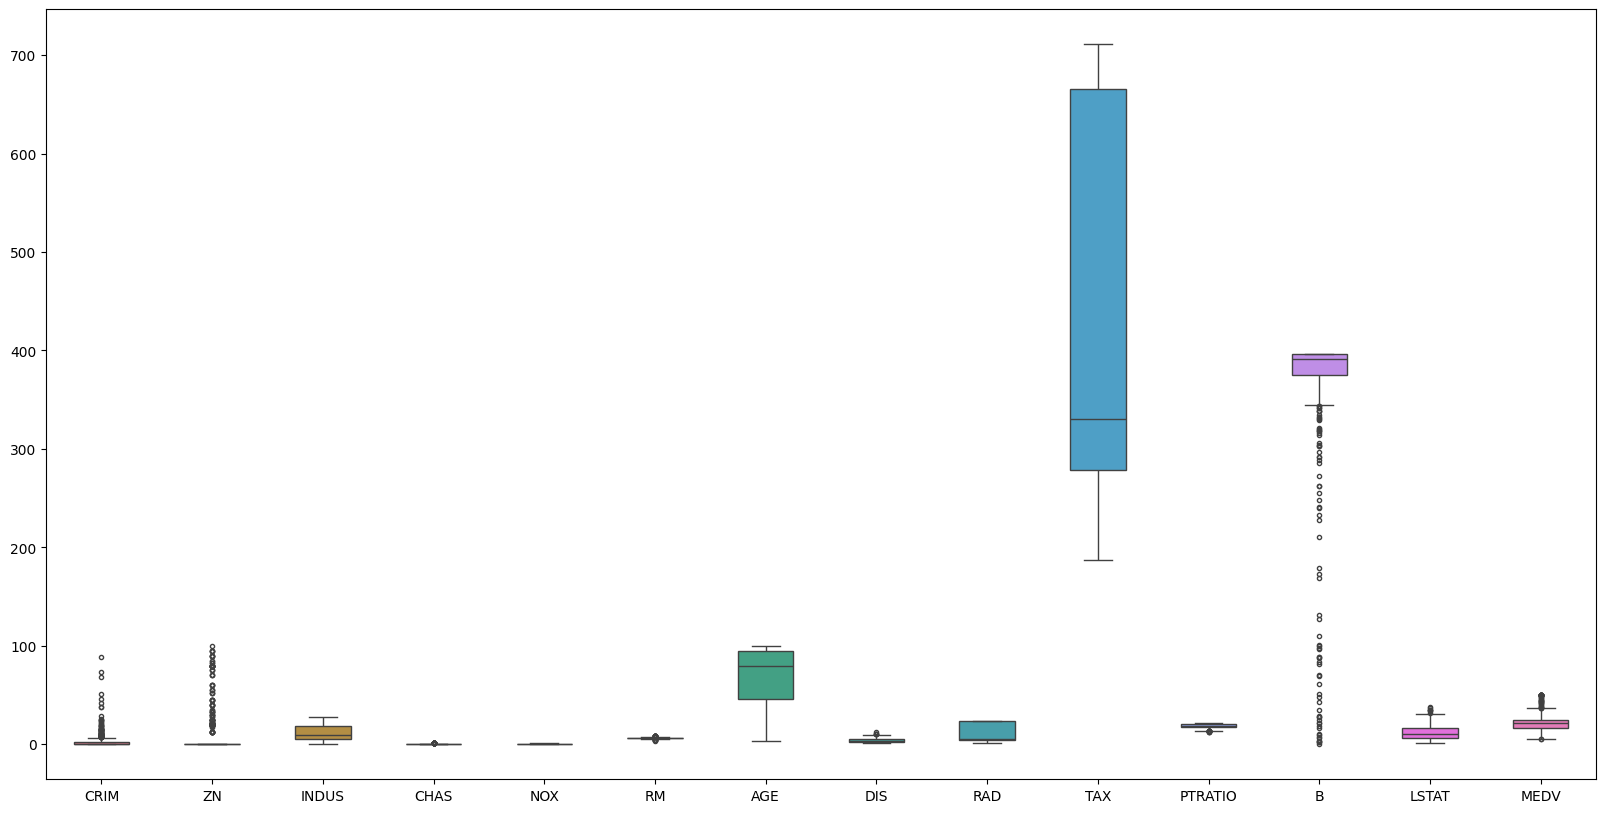

In [13]:
#looking for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_imputed, width= 0.5, fliersize=3)
plt.show()



there is presence of outliers


In [35]:

#removing outliers
#q = data_imputed['CRIM'].quantile(0.98)
# we are removing the top 2% data from the CRIM column
#data_cleaned = data_imputed[data_imputed['CRIM']<q]


In [65]:

X = data_cleaned.drop(columns = ['MEDV'])
y = data_cleaned['MEDV']


In [37]:
#lets use stardardscaler to remove the outliers from the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)



In [66]:
X_scaled

array([[ 0.        , -0.53166853,  0.30137799, ...,  0.42916   ,
        -1.04623934,  0.12963628],
       [ 0.        , -0.52717027, -0.47448965, ...,  0.42916   ,
        -0.44577555, -0.13530076],
       [ 0.        , -0.52717456, -0.47448965, ...,  0.38206307,
        -1.18336449,  1.31081393],
       ...,
       [ 0.        , -0.52000177, -0.47448965, ...,  0.42916   ,
        -0.95097345,  0.11859724],
       [ 0.        , -0.50953726, -0.47448965, ...,  0.38923754,
        -0.82972596, -0.09114459],
       [ 0.        , -0.52286274, -0.47448965, ...,  0.42916   ,
        -0.62764679, -1.20608797]])

In [ ]:
%pip install statsmodels

In [67]:
import statsmodels.api as sm
#lets check for multicollinearity using VIF(Variance Inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = data_cleaned.columns
#lets check the values
vif



,VIF,Features
0,NaN,const
1,3.093075,CRIM
2,2.163483,ZN
3,3.275986,INDUS
4,1.092102,CHAS
5,4.327391,NOX
6,2.263376,RM
7,2.598250,AGE
8,4.013704,DIS
9,8.186455,RAD


RAD and TAX have high VIF values hence high multicollinearity.i will remove RAD (feature with high VIF)

In [68]:

#dropping the columns with high VIF
X.drop(columns = ['RAD'],axis=1,inplace=True)

In [69]:

print(X.columns)

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


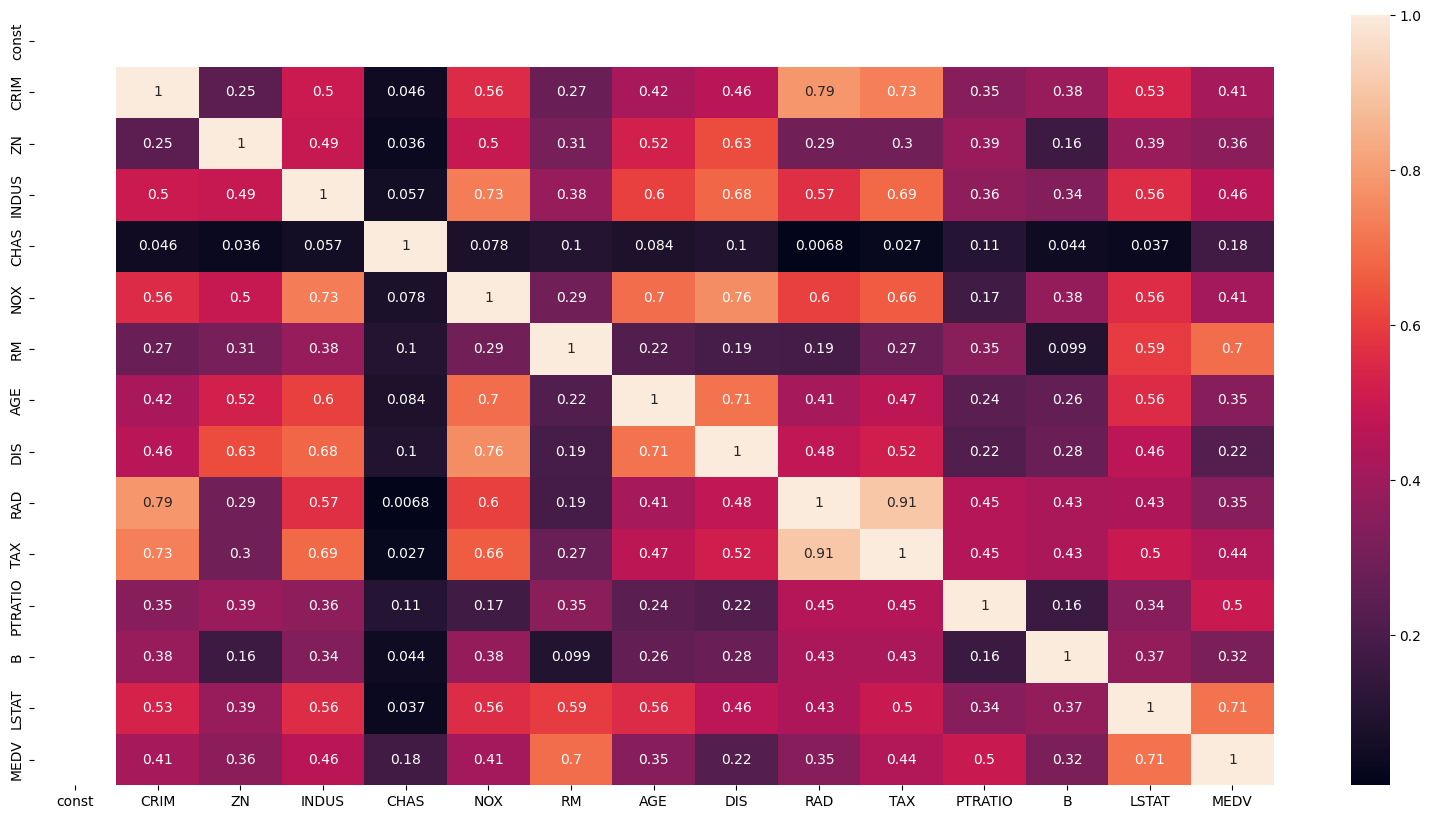

In [52]:

#heatmap for correlation
plt.figure(figsize=(20, 10))
sns.heatmap(data_cleaned.corr().abs(),  annot=True)
plt.show()

In [70]:

import statsmodels.formula.api as smf
lm=smf.ols(formula='MEDV~TAX',data=data_cleaned).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     119.8
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           4.21e-25
Time:                        09:52:24   Log-Likelihood:                -1739.4
No. Observations:                 495   AIC:                             3483.
Df Residuals:                     493   BIC:                             3491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.5518      0.961     33.868      0.000      30.663      34.440
TAX           -0.0242      0.002    -10.944      0.000      -0.029      -0.020
==============================================================================
Omnibus:                      167.693   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.675
Skew:                           1.660   Prob(JB):                    1.69e-102
Kurtosis:                       6.421   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
lm=smf.ols(formula='MEDV~RAD',data=data_cleaned).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     67.88
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.58e-15
Time:                        09:52:31   Log-Likelihood:                -1761.3
No. Observations:                 495   AIC:                             3527.
Df Residuals:                     493   BIC:                             3535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.2387      0.564     46.536      0.000      25.131      27.347
RAD           -0.3698      0.045     -8.239      0.000      -0.458      -0.282
==============================================================================
Omnibus:                      145.152   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.480
Skew:                           1.512   Prob(JB):                     1.16e-74
Kurtosis:                       5.713   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


INSIGHTS
we shall drop TAX as their is strong multicollinearity

In [86]:
data.drop(columns = ['TAX'],axis=1,inplace=True)

In [87]:

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,18.7,396.90,NaN,36.2
